In [1]:
from __future__ import print_function
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import random
random.seed(2010)

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.constraints import NonNeg
from keras import backend as K

Using TensorFlow backend.


In [2]:
#Import Data
Data = pd.read_csv('data/regression/Twitter/Twitter.data')
Data['rank_0.0']=Data['0.0'].rank()
X = Data['0.0']
Y = Data['rank_0.0']

In [3]:
batch_size = 128
no_input  = 1
epochs = 350
results = {}
no_output_range = range(1,5)
def customLoss(yTrue,yPred):
    return K.sum(K.min(K.square(yTrue-yPred),axis = 1))
for no_output in no_output_range:
    model = Sequential()
    model.add(Dense(32, activation='selu',
                    kernel_initializer='random_uniform', bias_initializer='zeros',kernel_constraint=NonNeg(),
                    input_shape=[no_input]))
    model.add(Dense(128, activation='selu',kernel_constraint=NonNeg()))
    model.add(Dense(128, activation='relu',kernel_constraint=NonNeg()))
    model.add(Dense(no_output,kernel_constraint=NonNeg(), activation='linear'))

    model.compile(loss=customLoss,
                  optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
                  metrics=['accuracy'])

    model.fit(X, Y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X, Y))
    score = model.evaluate(X, Y, verbose=0)
    print('Test loss:', score[0])

    YPred= model.predict(X)
    maxError = np.max(np.min(np.abs(YPred - Y.as_matrix().reshape(Y.shape[0],1)),axis=1),axis=0)
    results[no_output] = maxError
print(results)

Test loss: 812360690805.794


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Test loss: 154162463846.2211
Test loss: 68409337012.80895
Test loss: 37504667272.50518
{1: 3854440.0, 2: 3839414.5, 3: 1882840.75, 4: 2681190.25}


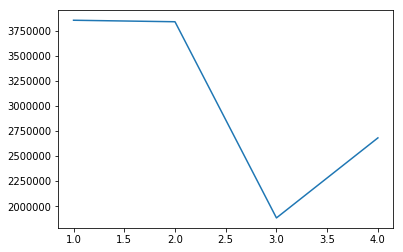

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
no_output_range = range(1,5)
plt.plot(results.keys(),results.values())

In [11]:
abs(-1)